In [111]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import anndata as ad

root = 'data'
datasets = ['Lung12', 'Lung13', 'Lung5_Rep1', 'Lung5_Rep2', 'Lung5_Rep3', 'Lung6', 'Lung9_Rep1', 'Lung9_Rep2']
r = 112
i = [[], [], []]

for dt in datasets:
    dataset = os.path.join(root, dt, f'{dt}-Flat_files_and_images')
    tx = pd.read_csv(os.path.join(dataset, f'{dt}_tx_file.csv'))
    img_folder = os.path.join(dataset, 'CellComposite')
    celle = pd.read_csv(os.path.join(dataset, f'{dt}_exprMat_file.csv'))
    celle.index = (celle['fov'].astype('str')+'_'+celle['cell_ID'].astype('str')).tolist()
    cellp = pd.read_csv(os.path.join(dataset, f'{dt}_metadata_file.csv'))
    cellp.index = (cellp['fov'].astype('str')+'_'+cellp['cell_ID'].astype('str')).tolist()
    celle = celle.loc[cellp.index]
    celle = celle.drop(['fov', 'cell_ID'], axis=1)

    adata = ad.AnnData(X=celle.values, obs=cellp)
    adata.var.index=celle.columns.tolist()
    adata = adata[(3647-adata.obs['CenterY_local_px']>=r) & (3647+r-adata.obs['CenterY_local_px']<=3648) &
                 (adata.obs['CenterX_local_px']>=r) & (r+adata.obs['CenterX_local_px']<=5472)]
    
#     c = []
#     bs = []
#     for f in tx['fov'].unique():
#         print('Fov', f)
#         im = Image.open(f'{img_folder}/CellComposite_F{"%03d" % f}.jpg')
#         loc = adata.obs[adata.obs['fov']==f]
#         a = np.array(im)
#         b = a.astype('int')
#         bs.append(b)
#         for line in loc.itertuples():
#             x = 3647-getattr(line, 'CenterY_local_px')
#             y = getattr(line, 'CenterX_local_px')
#             assert x-r >= 0 and x+r <= 3648
#             assert y-r >= 0 and y+r <= 5472
#             c.append(b[x-r: x+r, y-r:y+r][None])
#     c = np.concatenate(c)
#     adata.obsm['morp'] = c
#     adata.uns['imgs'] = bs
    adata.write_h5ad(dt+'.h5ad', compression='gzip')

/tmp/ipykernel_2882667/1665303642.py:24: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=celle.values, obs=cellp)
/tmp/ipykernel_2882667/1665303642.py:24: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=celle.values, obs=cellp)
/tmp/ipykernel_2882667/1665303642.py:24: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=celle.values, obs

In [1]:
import anndata as ad
from histocartography.preprocessing.feature_extraction import HandcraftedFeatureExtractor
adata = ad.read_h5ad('Lung5_Rep1.h5ad')
m = np.ones_like(f).astype('uint8')

In [5]:
from histocartography.preprocessing import NucleiExtractor, DeepFeatureExtractor, KNNGraphBuilder

nuclei_detector = NucleiExtractor()
feature_extractor = DeepFeatureExtractor(architecture='resnet34', patch_size=72)
knn_graph_builder = KNNGraphBuilder(k=5, thresh=50, add_loc_feats=True)

image = np.array(Image.open('{img_folder}/CellComposite_F{"%03d" % f}.jpg'))
nuclei_map, _ = nuclei_detector.process(image)
features = feature_extractor.process(image, nuclei_map)
cell_graph = knn_graph_builder.process(nuclei_map, features)

In [ ]:
from histocartography.visualization import OverlayGraphVisualization, InstanceImageVisualization

visualizer = OverlayGraphVisualization(
     instance_visualizer=InstanceImageVisualization(
         instance_style="filled+outline"
     )
)
viz_cg = visualizer.process(
     canvas=image,
     graph=cell_graph,
     instance_map=nuclei_map
)
viz_cg.show()

In [6]:
# import numpy as np
# h =  HandcraftedFeatureExtractor()
# feat = []
# for i in range(adata.shape[0]):
#     f=adata.obsm['morp'][i].astype('uint8')
#     feat.append(h._extract_features(f.astype(np.uint8), m.astype(np.uint8)[:, :, 0]))
# adata.obsm['hand'] = np.concatenate(feat)

In [112]:
# import scanpy as sc
# datasets = ['Lung12', 'Lung13', 'Lung5_Rep1', 'Lung5_Rep2', 'Lung5_Rep3', 'Lung6', 'Lung9_Rep1', 'Lung9_Rep2']
# ads = []
# # imgs = []
# for dt in datasets:
#     adata = ad.read_h5ad(dt+'.h5ad')
#     sc.pp.filter_cells(adata, min_genes=5)
#     sc.pp.normalize_total(adata, 1000)
#     sc.pp.log1p(adata)
#     adata.obs['dataset'] = dt
#     ads.append(adata)

In [113]:
# data = ad.concat(ads)

/egr/research-dselab/wenhongz/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/egr/research-dselab/wenhongz/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/egr/research-dselab/wenhongz/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
# imgs = dict(zip(datasets, imgs))

In [114]:
data = ad.read_h5ad('Lung_merged.h5ad')

In [27]:
import torch
torch.save(imgs, 'Lung_imgs_merged.pt')

In [28]:
for d in imgs:
    for i in imgs[d]:
        imgs[d][i] = torch.from_numpy(imgs[d][i])

In [115]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
class CustomImageDataset(Dataset):
    def __init__(self, data, imgs, id_list, r=112):
        self.imgs = imgs
        self.data = torch.from_numpy(data.X)
        self.mean = torch.tensor([19.528536058021583, 19.832453526270477, 40.23390620591592])[:, None, None]
        self.std = torch.tensor([18.334882013677042, 17.656087119286127, 32.736667837948936])[:, None, None]
        self.r = r
        self.datasets = data.obs['dataset'].values
        self.fovs = data.obs['fov'].values
        self.xs = data.obs['CenterY_local_px'].values
        self.ys = data.obs['CenterX_local_px'].values
        self.id_list = id_list

    def __len__(self):
        return len(self.id_list)

    def __getitem__(self, idx):
        idx = self.id_list[idx]
        whole_image = self.imgs[self.datasets[idx]][self.fovs[idx]]
        x = 3647-self.xs[idx]
        y = self.ys[idx]
#         print(x, y)
        image = whole_image[x-self.r: x+self.r, y-self.r:y+self.r]
        image = image.permute(2,0,1)
        image = (image.float() - self.mean)/self.std
        label = self.data[idx]
        return image, label


In [122]:
import numpy as np
data.obs['batch'] = data.obs['dataset'].astype('str') + '_' + data.obs['fov'].astype('str')
batch = np.array(list(data.obs['batch'].unique()))
np.random.shuffle(batch)

In [ ]:
import torch.nn.functional as F
from torch.optim import AdamW
from torch.nn import MSELoss
from tqdm import tqdm
def corr(y_true, y_pred):
    y_true_c = y_true - torch.mean(y_true, 1)[:, None]
    y_pred_c = y_pred - torch.mean(y_pred, 1)[:, None]
    pearson = torch.mean(torch.sum(y_true_c * y_pred_c, 1) / torch.sqrt(torch.sum(y_true_c * y_true_c, 1)+1e-8) / torch.sqrt(
        torch.sum(y_pred_c * y_pred_c, 1)+1e-8))
    return pearson

res = []
for i in range(5):
    test_bch = batch[int(len(batch)/5*i): int(len(batch)/5*(i+1))]
    train_bch = batch[:int(len(batch)/5*i)] + batch[int(len(batch)/5*(i+1)):]
    train = CustomImageDataset(data, imgs, np.arange(data.shape[0])[data.obs['batch'].isin(train_bch)])
    train_loader = DataLoader(train, batch_size=256, shuffle=True, sampler=None,
               batch_sampler=None, num_workers=64, drop_last=True)
    val = CustomImageDataset(data, imgs, np.arange(data.shape[0])[data.obs['batch'].isin(test_bch)])
    val_loader = DataLoader(val, batch_size=512, shuffle=False, sampler=None,
               batch_sampler=None, num_workers=64, drop_last=False)
    
    device=4
    model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True).to(device)
    mse = MSELoss()
    optim = AdamW(model.parameters(), lr=1e-2, weight_decay=1e-4)
    vals = []
    for epoch in range(100):
        losses = []
        for i, (x, y) in tqdm(enumerate(train_loader)):
            model.train()
            pred = F.relu(model(x.to(device))[:, :980])
            loss = mse(pred, y.to(device)) - corr(pred, y.to(device)) * 10
            losses.append(loss.item())
            optim.zero_grad()
            loss.backward()
            optim.step()
        loss = sum(losses)/len(losses)
        print('Start evaluation.')
        
        with torch.no_grad():
            model.eval()
            losses = []
            for _, (x, y) in tqdm(enumerate(val_loader)):
                pred = model(x.to(device))[:, :980]
                losses.append(corr(F.relu(pred), y.to(device)).item())
            vals.append(sum(losses)/len(losses))
            if max(vals) != max(vals[-2:]):
                break
        print('Train:', loss, 'Val:', sum(losses)/len(losses))
        losses = []
    print('Fold', i, 'Final val:', max(vals))
    res.append(max(vals))


Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0
2197it [30:01,  1.22it/s]

Start evaluation.



2197it [30:01,  1.22it/s]

Start evaluation.


Start evaluation.



285it [02:58,  1.59it/s]

Train: 94.10826142978061 Val: 0.4116374558001234


285it [02:58,  1.59it/s]

Train: 94.10826142978061 Val: 0.4116374558001234
Train: 94.10826142978061 Val: 0.4116374558001234





2197it [30:08,  1.21it/s]

Start evaluation.


2197it [30:08,  1.21it/s]


Start evaluation.
Start evaluation.




285it [02:54,  1.64it/s]

Train: -3.4267798892790804 Val: 0.417795100023872



285it [02:54,  1.64it/s]

Train: -3.4267798892790804 Val: 0.417795100023872
Train: -3.4267798892790804 Val: 0.417795100023872




2197it [29:53,  1.22it/s]

Start evaluation.


2197it [29:53,  1.22it/s]


Start evaluation.
Start evaluation.




285it [02:54,  1.64it/s]

Train: -2.781033442570613 Val: 0.41283183186723477


Train: -2.781033442570613 Val: 0.41283183186723477
Train: -2.781033442570613 Val: 0.41283183186723477




2197it [29:45,  1.23it/s]

Start evaluation.


Start evaluation.
Start evaluation.




285it [02:55,  1.62it/s]
Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0

Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0

Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0


Fold 2196 Final val: 0.417795100023872
Fold 2196 Final val: 0.417795100023872
Fold 2196 Final val: 0.417795100023872


2223it [30:30,  1.21it/s]

Start evaluation.


2223it [30:30,  1.21it/s]


Start evaluation.
Start evaluation.




272it [02:48,  1.62it/s]

Train: 125.15101441632399 Val: 0.372339996673605
Train: 125.15101441632399 Val: 0.372339996673605


Train: 125.15101441632399 Val: 0.372339996673605




2223it [30:43,  1.21it/s]

Start evaluation.


2223it [30:43,  1.21it/s]


Start evaluation.
Start evaluation.




272it [02:50,  1.60it/s]

Train: -3.5067103242638193 Val: 0.37583676240790415
Train: -3.5067103242638193 Val: 0.37583676240790415
Train: -3.5067103242638193 Val: 0.37583676240790415





2223it [30:36,  1.21it/s]

Start evaluation.


Start evaluation.
Start evaluation.




272it [02:50,  1.60it/s]

Train: -3.7259619204889693 Val: 0.39858311025754495


272it [02:50,  1.60it/s]

Train: -3.7259619204889693 Val: 0.39858311025754495
Train: -3.7259619204889693 Val: 0.39858311025754495





2223it [30:39,  1.21it/s]

Start evaluation.



272it [02:48,  1.61it/s]

Train: -3.808180527594837 Val: 0.40157331980984



679it [09:24,  1.20it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

2223it [30:52,  1.20it/s]

Start evaluation.



272it [02:52,  1.58it/s]

Train: -3.619764725903482 Val: 0.3878045428872985



2223it [30:57,  1.20it/s]

Start evaluation.



272it [02:53,  1.57it/s]
Using cache found in /home/wenhongz/.cache/torch/hub/pytorch_vision_v0.10.0


Fold 2222 Final val: 0.40157331980984


2199it [30:33,  1.20it/s]

Start evaluation.



2199it [30:17,  1.21it/s]

Start evaluation.



284it [03:00,  1.58it/s]

Train: -3.445504793854072 Val: 0.386748977320295



508it [06:59,  1.21it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

2199it [30:20,  1.21it/s]

Start evaluation.



284it [03:01,  1.57it/s]

Train: -3.465828820541264 Val: 0.3867411768247544



2199it [30:21,  1.21it/s]

Start evaluation.



284it [02:59,  1.58it/s]

Train: -3.467379036465793 Val: 0.38693179903735575



2199it [30:20,  1.21it/s]

Start evaluation.



284it [03:02,  1.56it/s]

Train: -3.467473663054254 Val: 0.3869004688737258



2199it [30:16,  1.21it/s]

Start evaluation.



170it [01:48,  1.67it/s]

In [ ]:
val_loader = DataLoader(val, batch_size=512, shuffle=False, sampler=None,
               batch_sampler=None, num_workers=64, drop_last=False)
with torch.no_grad():
    model.eval()
    losses = []
    for _, (x, y) in tqdm(enumerate(val_loader)):
        pred = model(x.to(device))[:, :980]
        losses.append(corr(F.relu(pred), y.to(device)).item())
print('Train:', loss, 'Val:', sum(losses)/len(losses))

In [198]:
with torch.no_grad():
    model.eval()
    preds = []
    ys = []
    for i, (x, y) in enumerate(test):
        pred = F.relu(model(x.to(device))[:, :980])
        preds.append(pred)
        ys.append(y.to(device))


In [199]:
preds = torch.cat(preds)
ys = torch.cat(ys)

print("Average Pearson Correlation:", corr(preds, ys).item(), "MSE", mse(preds, ys).item())

Average Pearson Correlation: 0.4271343946456909 MSE 0.40535852313041687


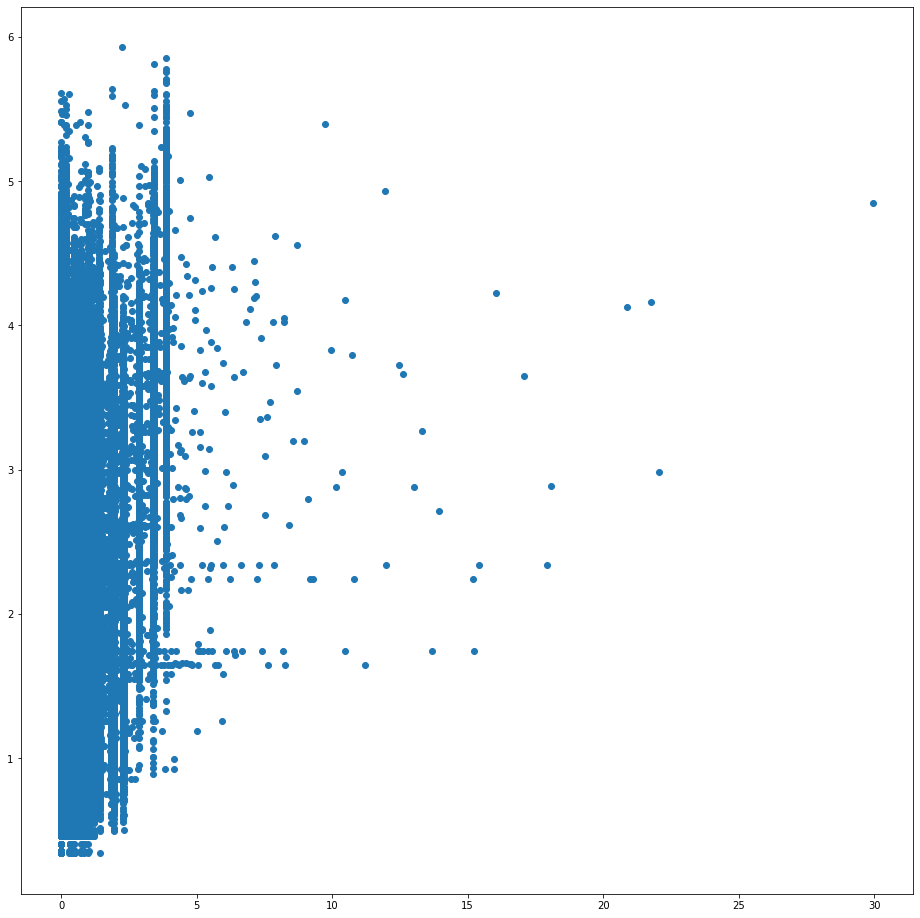

In [204]:
plt.scatter(preds[ys>0].cpu(), ys[ys>0].cpu())

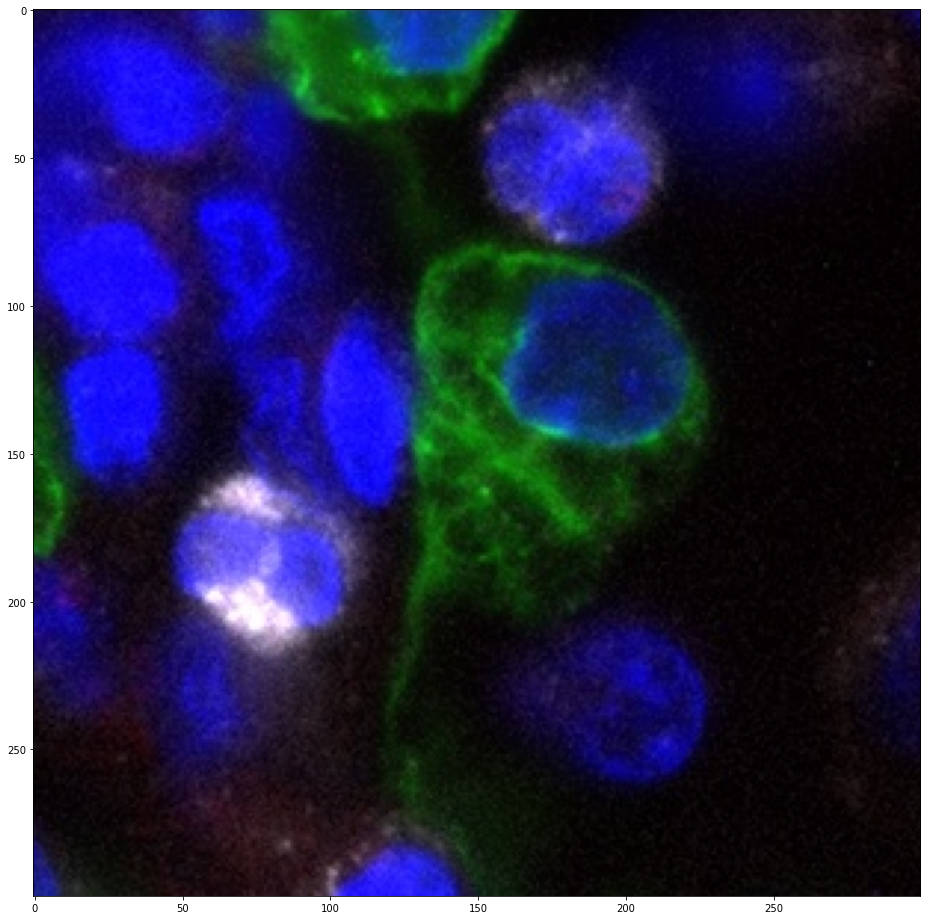

In [44]:
plt.rcParams['figure.figsize'] = 16, 16
plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 72
plt.imshow(temp.obsm['morp'][0].astype('uint8'))

In [13]:
adata.obsm['morp'] = 

AnnData object with n_obs × n_vars = 73997 × 980
    obs: 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI'

In [10]:
c[x-150, x+150, y-150:y+150]

array([], dtype=int64)

In [14]:
cellp

,fov,cell_ID,Area,AspectRatio,CenterX_local_px,CenterY_local_px,CenterX_global_px,CenterY_global_px,Width,Height,Mean.MembraneStain,Max.MembraneStain,Mean.PanCK,Max.PanCK,Mean.CD45,Max.CD45,Mean.CD3,Max.CD3,Mean.DAPI,Max.DAPI
1_1,1,1,3411,1.98,553,3625,-4424.777778,-156608.333333,93,47,7127,16033,3000,17172,78,588,80,610,12242,47623
1_2,1,2,2993,1.77,819,3626,-4158.777778,-156607.333333,78,44,13547,25859,12494,23204,102,410,0,85,0,0
1_3,1,3,5590,1.75,1102,3616,-3875.777778,-156617.333333,112,64,10353,22954,7951,21297,79,495,0,133,611,23078
1_4,1,4,9932,1.19,1392,3596,-3585.777778,-156637.333333,124,104,14990,45063,9127,28937,63,369,0,190,1423,18333
1_5,1,5,3158,2.05,1567,3626,-3410.777778,-156607.333333,90,44,6072,16689,8497,20100,37,322,0,0,2576,23629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28_3144,28,3144,1917,1.18,450,38,11888.888889,-138295.333333,52,44,1879,5069,141,551,13,201,0,0,3206,17936
28_3145,28,3145,1999,1.27,1910,38,13348.888889,-138295.333333,56,44,2077,6543,276,1188,14,360,0,32,5732,38502
28_3146,28,3146,1883,1.33,1476,37,12914.888889,-138296.333333,56,42,1796,9458,335,780,25,302,0,0,4187,24065
28_3147,28,3147,1676,1.42,2639,35,14077.888889,-138298.333333,54,38,1328,6724,93,622,0,45,0,0,4516,30947


In [9]:
x, y

(158, 1389)

In [ ]:
os.listdir(dataset)

In [ ]:
cellp['Width'].max()

In [ ]:
cellp['Height'].max()

In [ ]:
pd.read_csv(os.path.join(dataset, f'{dt}_metadata_file.csv'))

In [ ]:
cellp['CenterX_local_px'], cellp['CenterY_local_px']

In [ ]:
rna[['x_local_px','y_local_px']]

In [ ]:
loc